In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def first_polygon_mask(event,x,y,flags,params):    #gets the main overall segment
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(temp_image,(x,y),4,(255,0,0),-1)
        first_mask.append([x,y])
        cv2.imshow("image",temp_image)
        
def second_polygon_mask(event,x,y,flags,params):    #used to remove inner segments that aren't needed
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(temp_image,(x,y),4,(0,255,0),-1)
        second_mask.append([x,y])
        cv2.imshow("image",temp_image)
    if event == cv2.EVENT_RBUTTONDOWN:
        hold = second_mask.copy()    # second_mask and main_black are somehow connected by referencing..so I do this
        main_black.append(hold)
        print(second_mask)
        second_mask.clear()
        print("this is main black {}".format(main_black))
        print("got it")

[[408, 223], [406, 716], [445, 717], [462, 648], [517, 647], [529, 713], [593, 716], [601, 648], [651, 648], [677, 678], [689, 713], [738, 717], [735, 685], [749, 645], [785, 648], [822, 665], [846, 693], [864, 715], [905, 715], [882, 690], [874, 659], [880, 626], [914, 620], [952, 631], [970, 648], [980, 646], [980, 610], [981, 544], [970, 535], [937, 522], [891, 512], [876, 486], [877, 459], [887, 439], [910, 434], [933, 435], [959, 433], [979, 444], [991, 446], [987, 414], [988, 319], [923, 328], [874, 328], [859, 299], [863, 258], [901, 247], [928, 239], [956, 244], [987, 235], [962, 229], [931, 228], [897, 226], [778, 229], [774, 298], [729, 314], [675, 307], [669, 280], [674, 259], [678, 231], [592, 225], [552, 229], [556, 299], [527, 315], [503, 312], [484, 307], [471, 290], [473, 258], [476, 225], [414, 226], [410, 224]]


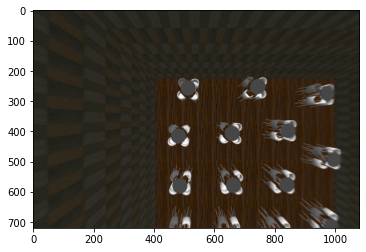

In [4]:
path = "factory_imgs/camera1.png"
im = cv2.imread(path)
imm = cv2.cvtColor(im,cv2.COLOR_RGB2BGR)
cp = im.copy()

first_mask = []
cv2.imshow("image",cp)
cv2.setMouseCallback("image",first_polygon_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(first_mask)



plt.imshow(imm)


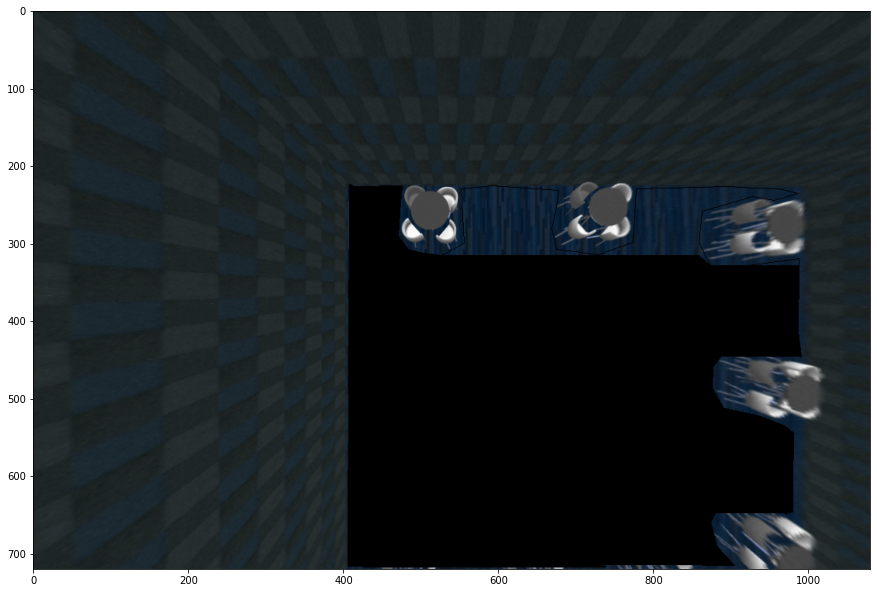

In [5]:
mask_w = np.zeros(temp_image.shape,dtype=np.uint8)
poly = np.int32(np.array(first_mask))
cv2.fillConvexPoly(mask_w,poly,(255,255,255))

mask_w = cv2.bitwise_not(mask_w)   # invert colors with this line
other_im = im.copy()
mask_two = cv2.bitwise_and(other_im,mask_w)
plt.figure(figsize=(15,15))
plt.imshow(white_mask)
    
# cv2.imshow("hh",final_mask)
# cv2.waitKey(0)
# cv2.destroyAllWindows




In [6]:
second_mask = []
main_second_mask = []
cv2.imshow("image",temp_image)
cv2.setMouseCallback("image",second_polygon_mask)
cv2.waitKey(0)
cv2.destroyAllWindows
print(main_second_mask)

[]


In [7]:
main_second_mask = np.array(main_second_mask)
mask_b = np.zeros(temp_image.shape,dtype=np.uint8)
print(main_second_mask.shape)

for pts in main_black:
    poly = np.int32(np.array(pts))
    cv2.fillConvexPoly(mask_b,poly,(255,255,255))
    other_im = im.copy()
    mask_one = cv2.bitwise_and(other_im,mask_b)
    
final_mask = cv2.bitwise_or(mask_two,mask_one)
final_mask = cv2.cvtColor(final_mask,cv2.COLOR_RGB2BGR)

plt.figure(figsize=(15,15))
plt.imshow(final_mask)
    
# black_mask = mask_one

(0,)


NameError: name 'black_mask' is not defined